In [1]:
using LinearAlgebra
using Plots
using Random
using Distributions
Random.seed!(1234);  # determinism

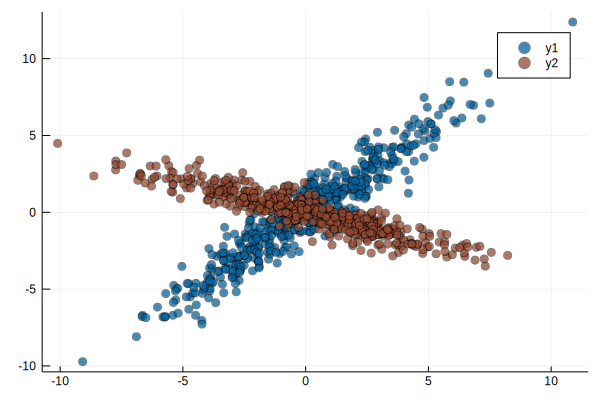

In [2]:
# 500 x 2 matrix from two multivariate Gaussians
nsamp = 500
d1,d2,o = 8.0, 10.0, 8.5; 
s1 = rand(MvNormal([0.0,0.0], [d1 o; o d2]), nsamp)'; 
d1,d2,o = 10.0, 2.0, -4.1; 
s2 = rand(MvNormal([0.0,0.0], [d1 o; o d2]), nsamp)';

scatter(s1[:,1], s1[:,2], alpha=0.5)
scatter!(s2[:,1], s2[:,2], alpha=0.5)

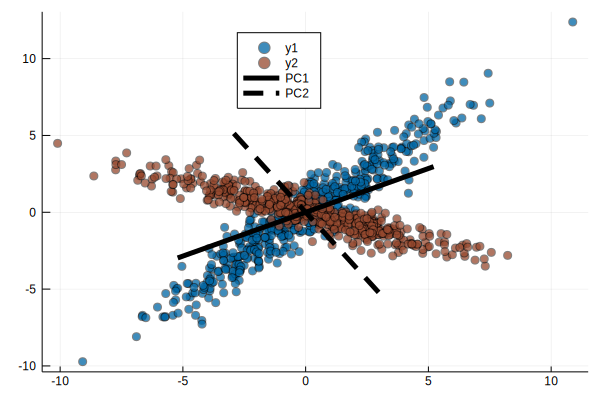

In [3]:
# PC directions from PCA
A = [s1; s2]
F = svd(A)
V = F.V
dir1x, dir1y = [-V[1,1], V[1,1]], [-V[2,1], V[2,1]]
dir2x, dir2y = [-V[1,2], V[1,2]], [-V[2,2], V[2,2]]
plot!(6 * dir1x, 6 * dir1y, lw=5, color="black", label="PC1")
plot!(6 * dir2x, 6 * dir2y, lw=5, color="black", label="PC2", 
      ls=:dash, legend=:top)

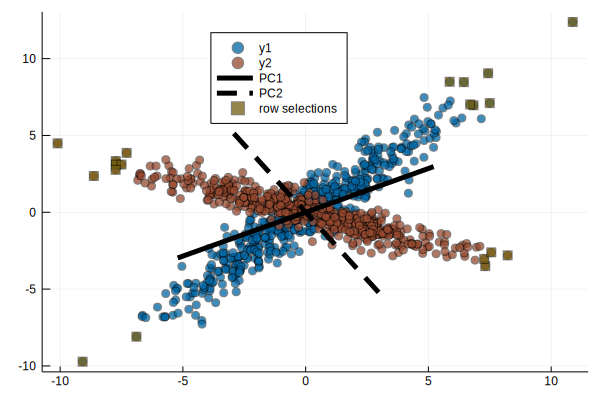

In [4]:
# ID on A^T / CUR with both columns
S = [1, 2]
T = sortperm(vec(sum(F.U .^ 2, dims=2)), rev=true)[1:20]
scatter!(A[T, 1], A[T, 2], marker=:square, alpha=0.5, label="row selections")

In [5]:
# Don't actually need U for the interpretability part
C = A[:, S]
R = A[T, :]
U = pinv(C) * A * pinv(R)

2×20 Array{Float64,2}:
 0.00542166  -0.0108409   -0.00475011  …   0.00784288  0.00370584  0.00355923
 0.0132758    0.00991037  -0.0102278      -0.00637697  0.00720143  0.00733205